# Apuntes

## Llamando librerias

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import io
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

## Leemos la base de datos a trabajar sobre datos economicos de la ciudad de Mexico

In [3]:
econdata = pd.read_csv('/root/Platzi/CurEstInf/notas_curso_est_inf_platzi/data/interim/datos.csv')
econdata.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuautémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real


## Funciones de muestreo en python

### Muestreo aleatorio simple

In [4]:
aleat_10 = econdata.sample(10) #! escojemos 10 datos aleatorios
aleat_10.head(10)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
212,212,"19.42155871,-99.1426572917","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",001_095_08,Cuautémoc,B,Hotel,Orense
84,84,"19.4426697365,-99.1426738122","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_056_09,Cuautémoc,B,Hotel,Las Americas
177,177,"19.43138889,-99.1370037108","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_030_06,Cuautémoc,A,Museo,Centro de Exposiciones Canter Europa
113,113,"19.43374405,-99.13550135","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_012_13,Cuautémoc,A,Hotel,San Antonio
186,186,"19.4275038262,-99.1346778267","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_052_24,Cuautémoc,A,Museo,Casa de la Memoria Indómita
133,133,"19.4388860834,-99.1250947991","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",005_099_14,Cuautémoc,B,Hotel,Venecia
202,202,"19.43916542,-99.1331749","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_081_23,Cuautémoc,A,Hotel,Río de Janeiro
8,8,"19.4343402009,-99.148212127","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_17,Cuautémoc,B,Hotel,Ambassador
17,17,"19.4316993602,-99.1461913295","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_039_09,Cuautémoc,B,Museo,Secretaria de la Seguridad Pública del Distrit...
54,54,"19.4263645964,-99.1399088724","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_076_12,Cuautémoc,B,Hotel,"Cadillac, S.A. DE C.V."


In [5]:
prop_25 = econdata.sample(frac=0.25) #! escojemos aleatoriamente el 25%
prop_25.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
135,135,"19.4300009578,-99.1430773295","{""type"": ""Polygon"", ""coordinates"": [[[-99.1431...",002_045_01,Cuauhtémoc,B,Mercado,"Centro Artesanal ""San Juan"""
160,160,"19.43610539,-99.1394124008","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_098_01,Cuautémoc,A,Museo,Museo Nacional de Arte
18,18,"19.4331161255,-99.1309438719","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_021_01,Cuautémoc,A,Museo,Museo Nacional de las Culturas
117,117,"19.4253041176,-99.1405962735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",001_078_03,Cuautémoc,B,Hotel,Mazatlán
87,87,"19.4397239469,-99.1461558557","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_075_19,Cuautémoc,B,Hotel,Astoria


### Muestreo sistematico

In [6]:
def systematic_sampling(data, step): #! escojemos cada 3 datos
    indexes = np.arange(0, len(data), step=step)
    return data.iloc[indexes]

systematic_sampling(econdata, 3)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz
...,...,...,...,...,...,...,...,...
216,216,"19.4247697438,-99.1249707246","{""type"": ""Polygon"", ""coordinates"": [[[-99.1250...",323_118_37,Venustiano Carranza,B,Mercado,Lamininas de La Merced
219,219,"19.4234096295,-99.1438351156","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_118_03,Cuautémoc,B,Hotel,Prado Floresta
222,222,"19.4397905042,-99.134628735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_063_10,Cuautémoc,A,Hotel,Ladero
225,225,"19.43094655,-99.12455418","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_027_04,Venustiano Carranza,B,Hotel,Gran Veracruz


### Muestreo estratificado

In [7]:
econdata['estratificado'] = econdata['delegacion'] + "," + econdata['tipo']

econdata['estratificado']

0             Cuauhtémoc,Mercado
1                Cuautémoc,Museo
2                Cuautémoc,Museo
3      Venustiano Carranza,Hotel
4      Venustiano Carranza,Hotel
                 ...            
225    Venustiano Carranza,Hotel
226           Cuauhtémoc,Mercado
227           Cuauhtémoc,Mercado
228              Cuautémoc,Museo
229              Cuautémoc,Museo
Name: estratificado, Length: 230, dtype: object

In [8]:
(econdata['estratificado'].value_counts()/len(econdata)).sort_values(ascending=False) #! contamos sobre cada tipo en cada ciudad y al dividir por el total estamos ayando la proporcion

estratificado
Cuautémoc,Hotel                0.643478
Cuautémoc,Museo                0.156522
Venustiano Carranza,Hotel      0.078261
Cuauhtémoc,Mercado             0.073913
Venustiano Carranza,Mercado    0.047826
Name: count, dtype: float64

Queremos en nuestro muestreo que:
1) Hoteles de Cauahtémoc: 0.5
2) Museos en Cauahtémoc: 0.2
3) Hoteles en Venustiana Carranza: 0.1
4) Mercados en Cauahtémoc: 0.1
5) Mercados en Venusiano Carranza: 0.1

In [9]:
def data_estratificada(econdata, nombres_columnas_estrat, valores_estrat, prop_estrat, random_state=None):
    
    df_estrat = pd.DataFrame(columns = econdata.columns) # Creamos un data frame vacío con los nombres de las columnas de econdata

    pos = -1
    for i in range(len(valores_estrat)): # iteración sobre los valores estratificados
        pos += 1
        if pos == len(valores_estrat) - 1: 
            ratio_len = len(econdata) - len(df_estrat) # si es la iteración final calcula el número de valores de salida tenga el mismo número de filas que de entrada
        else:
            ratio_len = int(len(econdata) * prop_estrat[i]) # calcula el número de filas según la proporción deseada

        df_filtrado = econdata[econdata[nombres_columnas_estrat] ==valores_estrat[i]] # filtra los datos de origen según los valores seleccionados en la estratificación de datos
        df_temp = df_filtrado.sample(replace=True, n=ratio_len, random_state=random_state) # haz un sample de los datos filtrados usando la ratio que hemos calculado
        
        df_estrat = pd.concat([df_estrat, df_temp]) # junta las tablas de sample con la estratificada para producir el resultado final
        
    return df_estrat # Return the stratified, re-sampled data  

valores_estrat = ['Cuautémoc,Hotel', 'Cuautémoc,Museo', 'Venustiano Carranza,Hotel', 'Cuauhtémoc,Mercado','Venustiano Carranza,Mercado']
prop_estrat = [0.5, 0.2, 0.1, 0.1,0.1]
df_estrat = data_estratificada(econdata, 'estratificado', valores_estrat, prop_estrat, random_state=42)
df_estrat

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado
164,164,"19.4388741511,-99.1413308257","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_113_03,Cuautémoc,B,Hotel,Dos Naciones,"Cuautémoc,Hotel"
142,142,"19.4263681354,-99.1327278126","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_127_14,Cuautémoc,A,Hotel,Ambar,"Cuautémoc,Hotel"
27,27,"19.4348360773,-99.1463945583","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_016_01,Cuautémoc,B,Hotel,Hilton Centro Histórico,"Cuautémoc,Hotel"
168,168,"19.4349726565,-99.147766133","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_23,Cuautémoc,B,Hotel,One Alameda,"Cuautémoc,Hotel"
113,113,"19.43374405,-99.13550135","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_012_13,Cuautémoc,A,Hotel,San Antonio,"Cuautémoc,Hotel"
...,...,...,...,...,...,...,...,...,...
128,128,"19.4270781084,-99.1210175514","{""type"": ""Polygon"", ""coordinates"": [[[-99.1214...",323_061_04(123),Venustiano Carranza,B,Mercado,San Ciprian,"Venustiano Carranza,Mercado"
37,37,"19.4271233834,-99.125111772","{""type"": ""Polygon"", ""coordinates"": [[[-99.1251...",323_065_01,Venustiano Carranza,B,Mercado,Dulceria,"Venustiano Carranza,Mercado"
163,163,"19.4265454033,-99.1224859032","{""type"": ""Polygon"", ""coordinates"": [[[-99.1231...",323_063_05,Venustiano Carranza,B,Mercado,NaN,"Venustiano Carranza,Mercado"
156,156,"19.4255480371,-99.1249308096","{""type"": ""Polygon"", ""coordinates"": [[[-99.1253...",323_138_04 (3),Venustiano Carranza,B,Mercado,Mariscos,"Venustiano Carranza,Mercado"


## Media y varianza muestral

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)
iris

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


/root/anaconda3/envs/final_project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/root/anaconda3/envs/final_project/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal-length', ylabel='Count'>

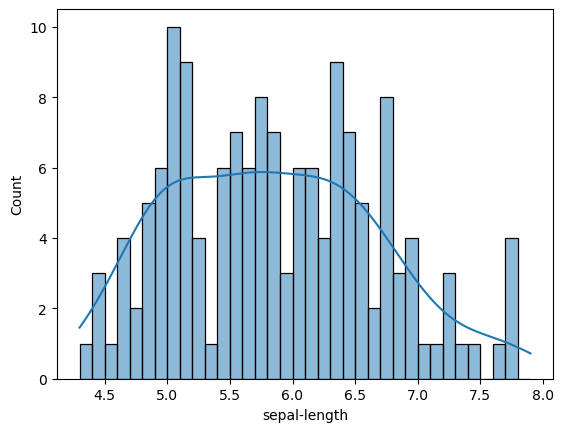

In [11]:
sns.histplot(data=iris, x='sepal-length', binwidth=0.1, kde=True)

In [12]:
iris['sepal-length'].var()

0.6856935123042505

In [13]:
iris['sepal-length'].std()

0.8280661279778629

In [14]:
iris['sepal-length'].mean()

5.843333333333334

### Muestreo

In [15]:
muestra = iris.sample(frac=0.1)

In [16]:
muestra['sepal-length'].var()

0.8035238095238093

In [17]:
muestra['sepal-length'].std()

0.8963948959715295

In [18]:
muestra['sepal-length'].mean()

5.693333333333333

## Intervalos de confianza

In [19]:
np.random.seed(20) 
var1 = np.random.randint(0, 10, 10) # Días de vacaciones
var2 = var1+np.random.normal(0, 1, 10) # Dinero gastado

In [20]:
var1

array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5])

In [21]:
var2

array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
       2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207])

In [22]:
tuple = list(zip(var1, var2))
tuple

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [23]:
tabla = pd.DataFrame(tuple,
                  columns = ['Días_vacaciones', 'Dinero_gastado'])
tabla

,Días_vacaciones,Dinero_gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


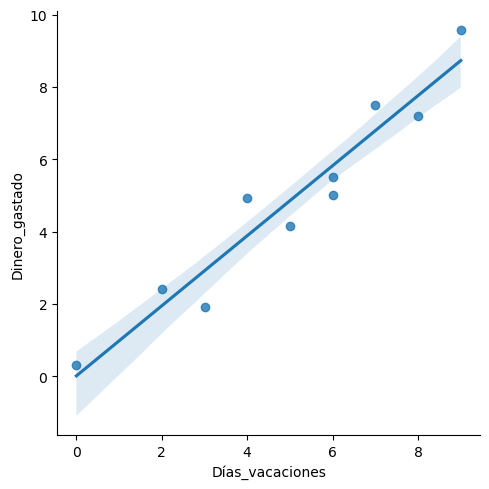

In [24]:
sns.lmplot(data=tabla, x='Días_vacaciones', y='Dinero_gastado', ci=90)

In [25]:
st.t.interval(confidence=0.95, df=len(tabla)-1, loc=np.mean(tabla), scale=st.sem(tabla)) 

(array([2.93201634, 2.92062172]), array([6.92208653, 6.93348116]))

## Prueba de hipótesis

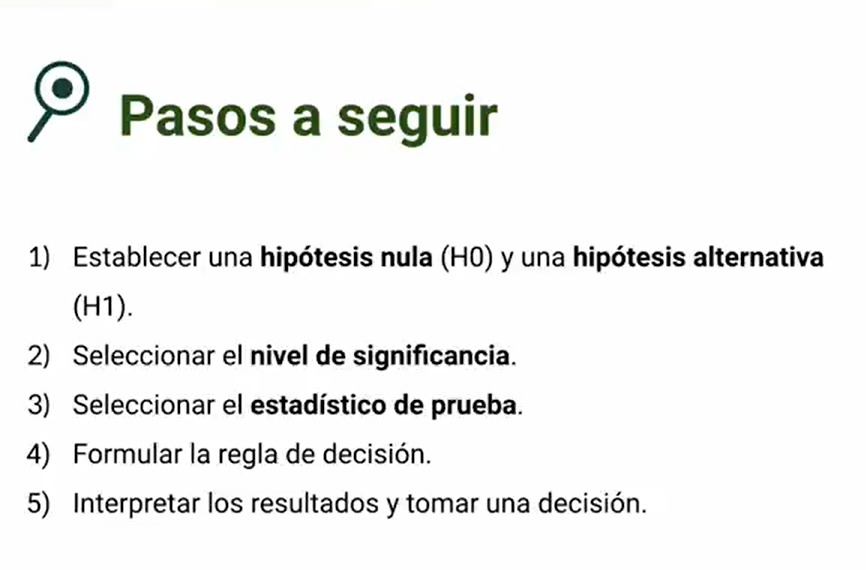

In [26]:
from IPython.display import display, Image
display(Image(filename="/root/Platzi/CurEstInf/notas_curso_est_inf_platzi/notas_curso_est_inf_platzi/visualization/Screenshot 2024-05-07 210407.png"))

## Tipos de pruebas

### 1) Distribución t de Student
standar erros $SE = \frac{\sigma}{\sqrt{N}}$, standard erro deviation $SED = \sqrt{\frac{\sigma_1^2}{N_1} + \frac{\sigma_2^2}{N_2}}$
$H_0:$ la distribucion de sepal-length y sepal-width son las mismas.

In [30]:
se_length = iris['sepal-length'].std()/np.sqrt(10)
se_width = iris['sepal-width'].std()/np.sqrt(10)

sed = np.sqrt(se_length**2 + se_width**2)

$t = \frac{(\bar{x_1} - \bar{x_2})}{SED}$

In [34]:
t_stat = (iris['sepal-length'].mean() - iris['sepal-width'].mean())/sed
t_stat

9.436693738890318

In [36]:
p = ttest_ind(iris['sepal-length'], iris['sepal-width'])
p

TtestResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112, df=298.0)

En este caso t > p, luego las distribuciones son diferentes y por tanto la hipotesis nula es falsa.

### 2) Correlación y coeficiente de Pearson

In [37]:
iris['sepal-length'].corr(iris['sepal-width'])

-0.10936924995064938

In [41]:
st.pearsonr(iris['sepal-length'],iris['sepal-width'])

PearsonRResult(statistic=-0.10936924995064932, pvalue=0.18276521527136963)

correlación zzz

### 3) Anova

In [44]:
f_oneway(iris['sepal-length'], iris['sepal-width'])

F_onewayResult(statistic=1335.7678308241748, pvalue=3.9878381148486907e-112)

zzz significancia

Todos los test dicen que hay que rechazar la hipotesis nula.

## Bootstrapping

In [46]:
data = np.random.normal(loc = 34, size = 10000)
data

array([35.29508238, 33.67386608, 32.30458418, ..., 34.30225565,
       35.25212103, 33.43855555])

In [48]:
promedio = []

for i in range(40):
    muestra = random.sample(data.tolist(),5)
    prom = np.mean(muestra)
    promedio.append(prom)
    
np.mean(promedio)

33.87776475230189

## Validación cruzada

In [50]:
df = pd.read_csv('/root/Platzi/CurEstInf/notas_curso_est_inf_platzi/data/interim/cancerdata_80367619-ee78-44cd-a7dc-7970bf56fa94.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [58]:
x = df.iloc[:,2:]
y = df.iloc[:,1]
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=4)
modelo = DecisionTreeClassifier()
modelo.fit(x_train, y_train)
resultado = modelo.score(x_test, y_test)
print(resultado)

0.9064327485380117


In [75]:
from sklearn.model_selection import KFold

In [76]:
modelo = DecisionTreeClassifier()
kfold_vallidacion = KFold(10)

In [77]:
from sklearn.model_selection import cross_val_score

In [79]:
resultados = cross_val_score(modelo, x, y, cv = kfold_vallidacion)
print(resultado)
resultados.mean()

0.9064327485380117


0.931484962406015